In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
df=pd.read_csv('train.csv')


In [51]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [52]:
df.shape

(1460, 81)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [67]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Fence            1179
FireplaceQu       690
GarageType         81
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 80, dtype: int64

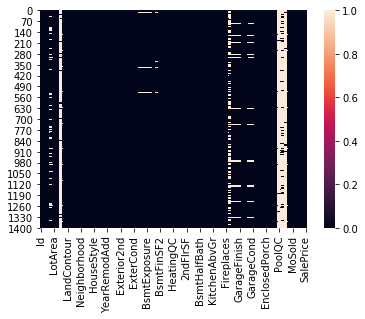

In [55]:
sns.heatmap(df.isnull())

In [56]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [57]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())


In [58]:
df.drop(['Alley'],axis=1,inplace=True)


In [60]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [68]:
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [81]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [82]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)


KeyError: "['GarageYrBlt'] not found in axis"

In [83]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [71]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)


In [72]:
df.drop(['Id'],axis=1,inplace=True)


In [75]:
df.isnull().sum()


MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [79]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])


In [85]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])


In [87]:
df.dropna(inplace=True)


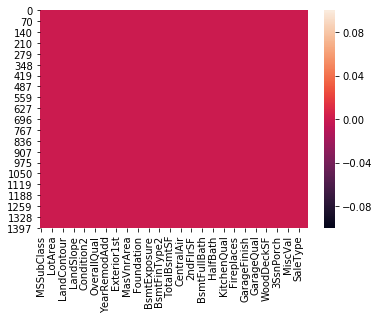

In [88]:
sns.heatmap(df.isnull())

In [89]:
df.shape


(1422, 75)

In [98]:
df_obj=df.dtypes[df.dtypes=="object"].index

In [117]:
len(df_obj)

39

In [119]:
df_cat=df[df_obj]

In [132]:
df_num=[i for i in df.columns if i not in df_obj ]

In [133]:
df_num

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [147]:
len(df_num)


36

In [148]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [149]:
main_df=df.copy()

In [154]:
test_df=pd.read_csv('formulatedtest.csv')


In [155]:
final_df=pd.concat([df,test_df],axis=0)


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [156]:
final_df.shape


(2881, 75)

In [158]:
final_df=category_onehot_multcols(df_cat)


MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [159]:
final_df.shape


(2881, 235)

In [160]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]


In [161]:
final_df.shape


(2881, 175)

In [162]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [163]:
df_Train.head()


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,0,0,0,1,0


In [164]:
df_Test.head()


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,0,0,1,0,0,0,1,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,0,0,1,0,0,0,1,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,0,0,1,0,0,0,1,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,0,0,1,0,0,0,1,0


In [165]:
df_Train.shape


(1422, 175)

In [166]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [167]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [168]:
import xgboost
regressor=xgboost.XGBRegressor()

In [169]:
regressor.fit(X_train,y_train)


C:\Users\LENOVO\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\LENOVO\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[22:44:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [174]:
y_pred=regressor.predict(df_Test)


In [177]:
y_pred

array([119813.12 , 155400.9  , 181031.1  , ..., 176146.92 , 122068.414,
       242462.73 ], dtype=float32)

In [179]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)